<h1>Self Attention Test<h1>

In [14]:
import torch

T = 7
d_x = 3
d_l = 5
d_q = 6

<h1>Define weights matrix and input<h1>

In [18]:
X = torch.randn([d_x, T])
print(X)
print(X.shape)
W_q = torch.randn([d_q, d_x])
print(W_q)
print(W_q.shape)
W_k = torch.randn([d_q, d_x])
print(W_k)
print(W_k.shape)
W_v = torch.randn([d_l, d_x])
print(W_v)
print(W_v.shape)

tensor([[-0.7975, -0.4805, -1.3155, -0.6534, -0.9950, -1.0602, -1.8805],
        [ 0.4436,  0.7232,  0.3372,  1.2349, -1.8208, -0.2054,  1.8706],
        [-2.3799, -1.1399,  0.0171, -0.7282,  0.6315,  0.4676,  0.3652]])
torch.Size([3, 7])
tensor([[-0.7491,  0.4444, -0.3116],
        [-0.0186, -0.4607, -1.0052],
        [ 0.2374, -0.5522, -1.0469],
        [-2.0372,  0.6436, -0.0832],
        [ 1.1232, -1.9124, -0.1179],
        [ 0.8806, -0.7003, -0.2040]])
torch.Size([6, 3])
tensor([[-2.6649,  0.5756, -1.4380],
        [-1.4363,  0.8172,  0.8865],
        [-1.0472,  0.5375, -0.7475],
        [-0.3913, -0.8948, -1.5263],
        [ 0.2996,  2.0231, -0.5262],
        [ 0.4942,  1.0280, -0.2480]])
torch.Size([6, 3])
tensor([[-0.7027,  1.1790,  0.6464],
        [ 0.1710, -2.0413,  0.6021],
        [ 0.5520, -0.6594, -1.2384],
        [-0.8372,  1.0238, -0.4169],
        [-0.1315,  1.7853,  1.2653]])
torch.Size([5, 3])


<h1>Compute key and query<h1>

tensor([[ 18.3076,  11.0302,  10.2977,  11.8701,  -1.4896,   4.6882,  17.3479],
        [ 11.0302,   8.2652,   9.9297,  11.0528,  -3.0624,   5.0622,  20.0317],
        [ 10.2977,   9.9297,  16.4186,  15.9732,  -3.3022,   9.8150,  34.4613],
        [ 11.8701,  11.0528,  15.9732,  17.1435,  -5.7852,   8.7484,  34.7412],
        [ -1.4896,  -3.0624,  -3.3022,  -5.7852,   6.0906,  -0.8889, -10.9535],
        [  4.6882,   5.0622,   9.8150,   8.7484,  -0.8889,   6.2973,  20.3119],
        [ 17.3479,  20.0317,  34.4613,  34.7412, -10.9535,  20.3119,  76.5611]])
torch.Size([7, 7])
tensor([[7.2168e-01, 4.9866e-04, 2.3972e-04, 1.1550e-03, 1.8220e-09, 8.7811e-07, 2.7642e-01],
        [1.2318e-04, 7.7579e-06, 4.0985e-05, 1.2600e-04, 9.3371e-11, 3.1528e-07, 9.9970e-01],
        [3.2055e-11, 2.2187e-11, 1.4594e-08, 9.3481e-09, 3.9770e-17, 1.9782e-11, 1.0000e+00],
        [1.1673e-10, 5.1553e-11, 7.0656e-09, 2.2772e-08, 2.5097e-18, 5.1459e-12, 1.0000e+00],
        [5.0964e-04, 1.0573e-04, 8.3191e-05,

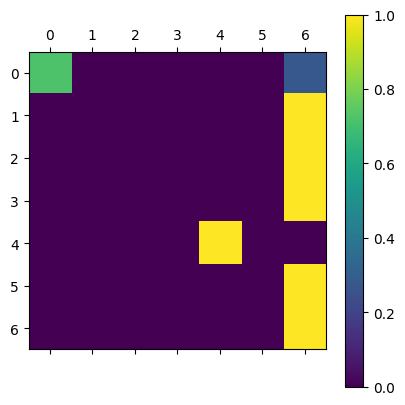

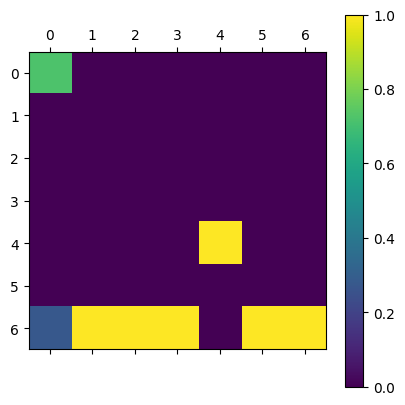

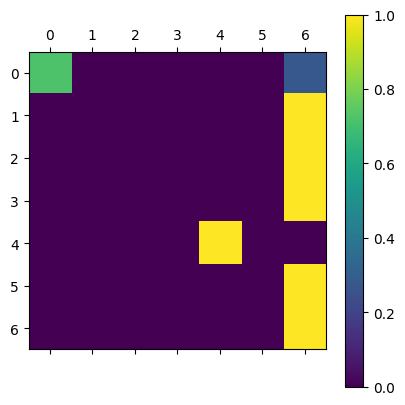

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2622e-29],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [21]:
import numpy as np
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth=200)

K= torch.matmul(torch.t(X), torch.t(W_q))
Q = torch.matmul(W_q, X)
# The heart of Attention is this matrix mult, each key is compared with each query with the cosine similarity (dot pruduct)
KQ = torch.matmul(K,Q)
print(KQ)
# The results is a symmetric matrix
print(KQ.shape)
# now the Softmax respecting the col
sm_col = torch.nn.Softmax(dim=1)
# now the Softmax respecting the row
sm_row = torch.nn.Softmax(dim=0)
att_col = sm_col(KQ)

print(att_col)
print(att_col.sum(1))

plt.matshow(att_col)
plt.colorbar()
plt.show()

att_row = sm_row(KQ)
# Care softmax dim matters! 
plt.matshow(att_row)
plt.colorbar()
plt.show()

#If we transpose than it is the same as at the top
plt.matshow(torch.t(att_row))
plt.colorbar()
plt.show()

print((att_col - torch.t(att_row))**2)

<h1> Now let's look at the value<h1>

In [24]:
V = torch.matmul(W_v, X)
# d_l times T
print(V.shape)
print(V)
Y = torch.matmul(V,att_row)
print(Y.shape)
print(Y)

torch.Size([5, 7])
tensor([[-0.4550,  0.4535,  1.3330,  1.4444, -1.0394,  0.8051,  3.7629],
        [-2.4749, -2.2449, -0.9030, -3.0710,  3.9269,  0.5196, -3.9201],
        [ 2.2146,  0.6695, -0.9698, -0.2732, -0.1307, -1.0289, -2.7238],
        [ 2.1139,  1.6179,  1.4395,  2.1148, -1.2943,  0.4823,  3.3371],
        [-2.1144, -0.0878,  0.7967,  1.3694, -2.3208,  0.3644,  4.0491]])
torch.Size([5, 7])
tensor([[ 0.7140,  3.7619,  3.7629,  3.7629, -1.0370,  3.7628,  3.7629],
        [-2.8746, -3.9197, -3.9201, -3.9201,  3.9194, -3.9200, -3.9201],
        [ 0.8451, -2.7228, -2.7238, -2.7238, -0.1303, -2.7238, -2.7238],
        [ 2.4516,  3.3367,  3.3371,  3.3371, -1.2904,  3.3370,  3.3371],
        [-0.4050,  4.0478,  4.0491,  4.0491, -2.3177,  4.0490,  4.0491]])
